In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# https://bmrs.elexon.co.uk/api-documentation/introduction 
# df = pd.read_csv("InterconnectorFlows_18102023_to_181024_30min.csv")

df = pd.read_csv("int_data.csv")
df.head()

,Unnamed: 0,INTELEC,INTEW,INTFR,INTGRNL,INTIFA2,INTIRL,INTNED,INTNEM,INTNSL,INTVKL
0,0,35,-158,825,0.0,948,-113,-33,446,695,0.0
1,1,50,-128,984,0.0,882,-321,577,729,715,0.0
2,2,789,-320,607,0.0,-2,-317,-132,244,-106,0.0
3,3,951,-240,960,0.0,-2,-206,599,772,1237,0.0
4,4,705,-92,598,0.0,-2,-158,134,450,1065,0.0


In [2]:
df.drop("Unnamed: 0", axis = 1, inplace=True)
df.columns

Index(['INTELEC', 'INTEW', 'INTFR', 'INTGRNL', 'INTIFA2', 'INTIRL', 'INTNED',
       'INTNEM', 'INTNSL', 'INTVKL'],
      dtype='object')

In [98]:
# df = df[df["FuelType"] != 'INTGRNL'] # removing greenlink as all generation is 0
# df.head()

,Dataset,PublishTime,SettlementDate,SettlementPeriod,FuelType,Generation
StartTime,,,,,,
2023-10-18T16:00:00Z,FUELHH,2023-10-18T16:30:00Z,2023-10-18,35,INTELEC,996
2023-10-18T16:00:00Z,FUELHH,2023-10-18T16:30:00Z,2023-10-18,35,INTEW,-252
2023-10-18T16:00:00Z,FUELHH,2023-10-18T16:30:00Z,2023-10-18,35,INTFR,994
2023-10-18T16:00:00Z,FUELHH,2023-10-18T16:30:00Z,2023-10-18,35,INTIFA2,992
2023-10-18T16:00:00Z,FUELHH,2023-10-18T16:30:00Z,2023-10-18,35,INTIRL,-452


In [11]:
inters = set(df["FuelType"])
inters_info = {i:[0]*4 for i in set(df["FuelType"])}
inters_info = {
    "name" : [i for i in inters],
    "sum" : [0]*len(inters),
    "max" : [0]*len(inters),
    "min" : [0]*len(inters),
    "count" : [0]*len(inters),
}

for i, inter in enumerate(inters):
    inter_info = df[df["FuelType"] == inter]["Generation"]
    inters_info["sum"][i] = inter_info.sum()
    inters_info["max"][i] = inter_info.max()
    inters_info["min"][i] = inter_info.min()
    inters_info["count"][i] = len(inter_info)
    

In [88]:
inter_info = df[df["FuelType"] == 'INTGRNL']["Generation"]

In [ ]:
inters_info

<BarContainer object of 10 artists>

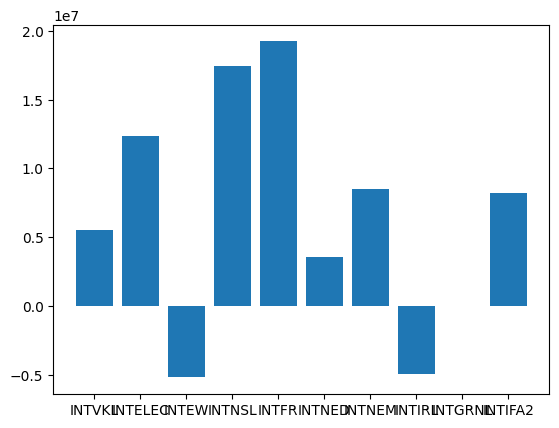

In [12]:
plt.bar(
    x=inters_info["name"],
    height=inters_info["sum"]
)

In [15]:
df.index

Index(['2023-10-18T16:00:00Z', '2023-10-18T16:00:00Z', '2023-10-18T16:00:00Z',
       '2023-10-18T16:00:00Z', '2023-10-18T16:00:00Z', '2023-10-18T16:00:00Z',
       '2023-10-18T16:00:00Z', '2023-10-18T16:00:00Z', '2023-10-18T16:30:00Z',
       '2023-10-18T16:30:00Z',
       ...
       '2024-10-18T15:30:00Z', '2024-10-18T15:30:00Z', '2024-10-18T15:30:00Z',
       '2024-10-18T15:30:00Z', '2024-10-18T15:30:00Z', '2024-10-18T15:30:00Z',
       '2024-10-18T15:30:00Z', '2024-10-18T15:30:00Z', '2024-10-18T15:30:00Z',
       '2024-10-18T15:30:00Z'],
      dtype='object', name='StartTime', length=159966)

In [37]:
df2 = pd.DataFrame([(df[df["FuelType"] == inters_info["name"][i]]["Generation"]) for i in range(len(inters_info["name"]))], columns=[inters_info["name"]], )
# df2["StartTime"] = pd.Series()

In [39]:
df2

,INTVKL,INTELEC,INTEW,INTNSL,INTFR,INTNED,INTNEM,INTIRL,INTGRNL,INTIFA2
Generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# [(df[df["FuelType"] == inters_info["name"][i]]["Generation"]) for i in range(len(inters_info["name"]))]
pd.DataFrame([[1],[2,3,3,3],[3,23,3,3],[4,2,3,3]])

,0,1,2,3
0,1,NaN,NaN,NaN
1,2,3.0,3.0,3.0
2,3,23.0,3.0,3.0
3,4,2.0,3.0,3.0


In [30]:
df2.set_index("StartTime")

,INTVKL,INTELEC,INTEW,INTNSL,INTFR,INTNED,INTNEM,INTIRL,INTGRNL,INTIFA2
StartTime,,,,,,,,,,
"(nan,)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(nan,)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(nan,)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(nan,)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(nan,)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(nan,)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(nan,)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(nan,)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(nan,)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df[df["FuelType"] == inters_info["name"][1]]["Generation"]

StartTime
2023-10-18T16:00:00Z    996
2023-10-18T16:30:00Z    996
2023-10-18T17:00:00Z    996
2023-10-18T17:30:00Z    998
2023-10-18T18:00:00Z    996
                       ... 
2024-10-18T13:30:00Z      0
2024-10-18T14:00:00Z      0
2024-10-18T14:30:00Z      0
2024-10-18T15:00:00Z      0
2024-10-18T15:30:00Z      0
Name: Generation, Length: 17567, dtype: int64